In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### pandas matplotlib

- Pandas 0.7 버전 이상부터 matplotlib를 사용한 그래프 지원
- Dataframe, series별로 그래프 작성 가능

### Boston House Price Dataset

- 머신러닝 등 데이터 분석을 처음 배울 때, 가장 대표적으로 사용하는 Example Dataset
- 1978년에 발표된 데이터로, 미국 인구통계 조사 결과 미국 보스턴 지역의 주택 가격에 영향 요소들을 정리함
- http://lib.stat.cmu.edu/datasets/boston

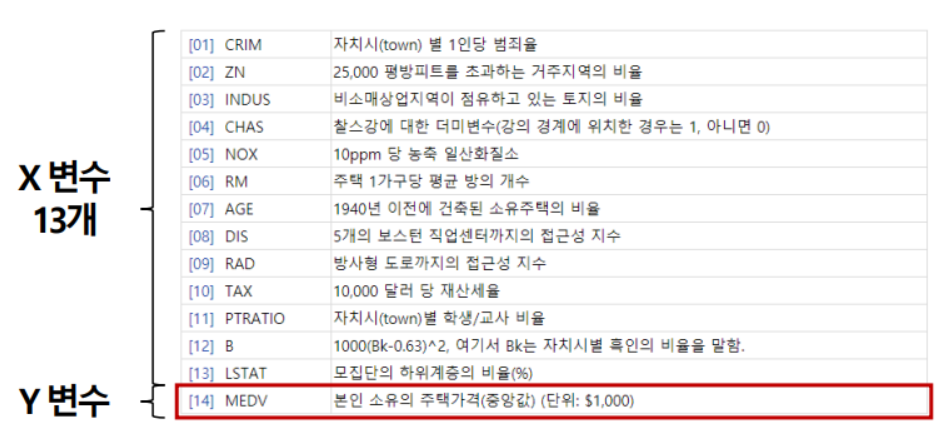

- http://www.dator.co.kr/ctg258/textyle/1721307
- http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

- 데이터 간의 "상관관계"를 볼 때 scatter graph 사용 가능

In [7]:
from sklearn import datasets

dataset = datasets.load_boston()
df_data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df_data['MEDV'] = dataset.target
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


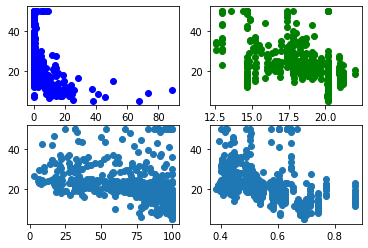

In [12]:
fig = plt.figure()
ax = []
for i in range(1, 5):
    ax.append(fig.add_subplot(2, 2, i))

ax[0].scatter(df_data["CRIM"], df_data["MEDV"], color = 'b', label = 'CRIM')       # 1인당 범죄율 & 주택가격
ax[1].scatter(df_data["PTRATIO"], df_data["MEDV"], color = 'g')                    # 학생/교사 비율 & 주택가격
ax[2].scatter(df_data["AGE"], df_data["MEDV"])                                     # 1940년 이전에 건축된 소유주택의 비율 & 주택가격
ax[3].scatter(df_data["NOX"], df_data["MEDV"])                                     # 10ppm당 농축 일산화질소 & 주택가격
plt.show()

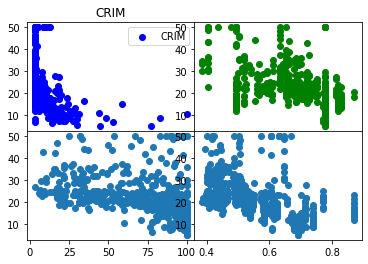

In [11]:
fig = plt.figure()
ax = []
for i in range(1, 5):
    ax.append(fig.add_subplot(2, 2, i))

ax[0].scatter(df_data["CRIM"], df_data["MEDV"], color = 'b', label = 'CRIM')       # 1인당 범죄율 & 주택가격
ax[1].scatter(df_data["PTRATIO"], df_data["MEDV"], color = 'g')                    # 학생/교사 비율 & 주택가격
ax[2].scatter(df_data["AGE"], df_data["MEDV"])                                     # 1940년 이전에 건축된 소유주택의 비율 & 주택가격
ax[3].scatter(df_data["NOX"], df_data["MEDV"])                                     # 10ppm당 농축 일산화질소 & 주택가격

plt.subplots_adjust(wspace = 0, hspace = 0)       # subplot들을 공백없이 붙여줌
ax[0].legend()
ax[0].set_title('CRIM')
plt.show()

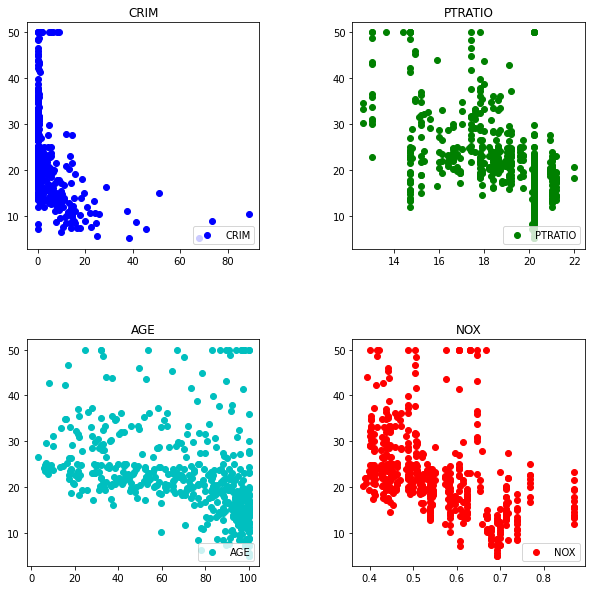

In [19]:
# 최종

fig = plt.figure()
fig.set_size_inches(10, 10, forward = True)
ax = []
for i in range(1, 5):
    ax.append(fig.add_subplot(2, 2, i))

columns = ['CRIM', 'PTRATIO', 'AGE', 'NOX']
colors = ['b', 'g', 'c', 'r']
for i in range(len(columns)):
    ax[i].scatter(df_data[columns[i]], df_data["MEDV"], color = colors[i], label = columns[i])
    ax[i].legend(loc="lower right")
    ax[i].set_title(columns[i])

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.show()

- plot 함수를 사용하면 전체 데이터의 graph를 그림

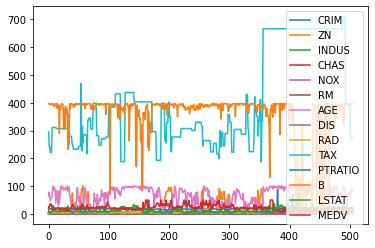

In [20]:
df_data.plot()
plt.show()

Text(0.5, 1.0, 'House Price MEDV')

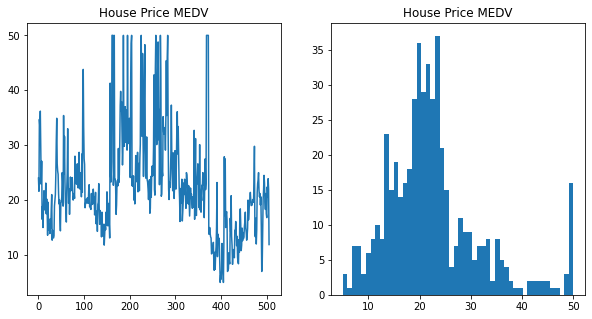

In [22]:
fig = plt.figure()
fig.set_size_inches(10, 5)
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
ax_1.plot(df_data['MEDV'])
ax_2.hist(df_data['MEDV'], bins = 50)
ax_1.set_title("House Price MEDV")
ax_2.set_title("House Price MEDV")

### Scaled boxplot

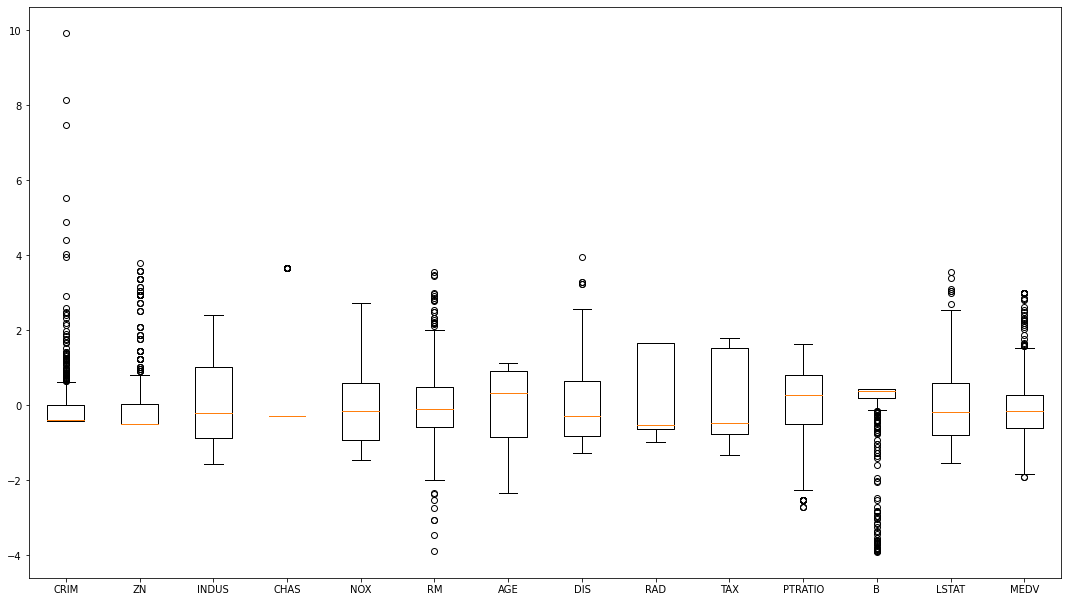

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scale_data = std_scaler.fit_transform(df_data)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(scale_data, labels = df_data.columns)
fig.set_size_inches(18.5, 10.5)

### Scatter Matrix

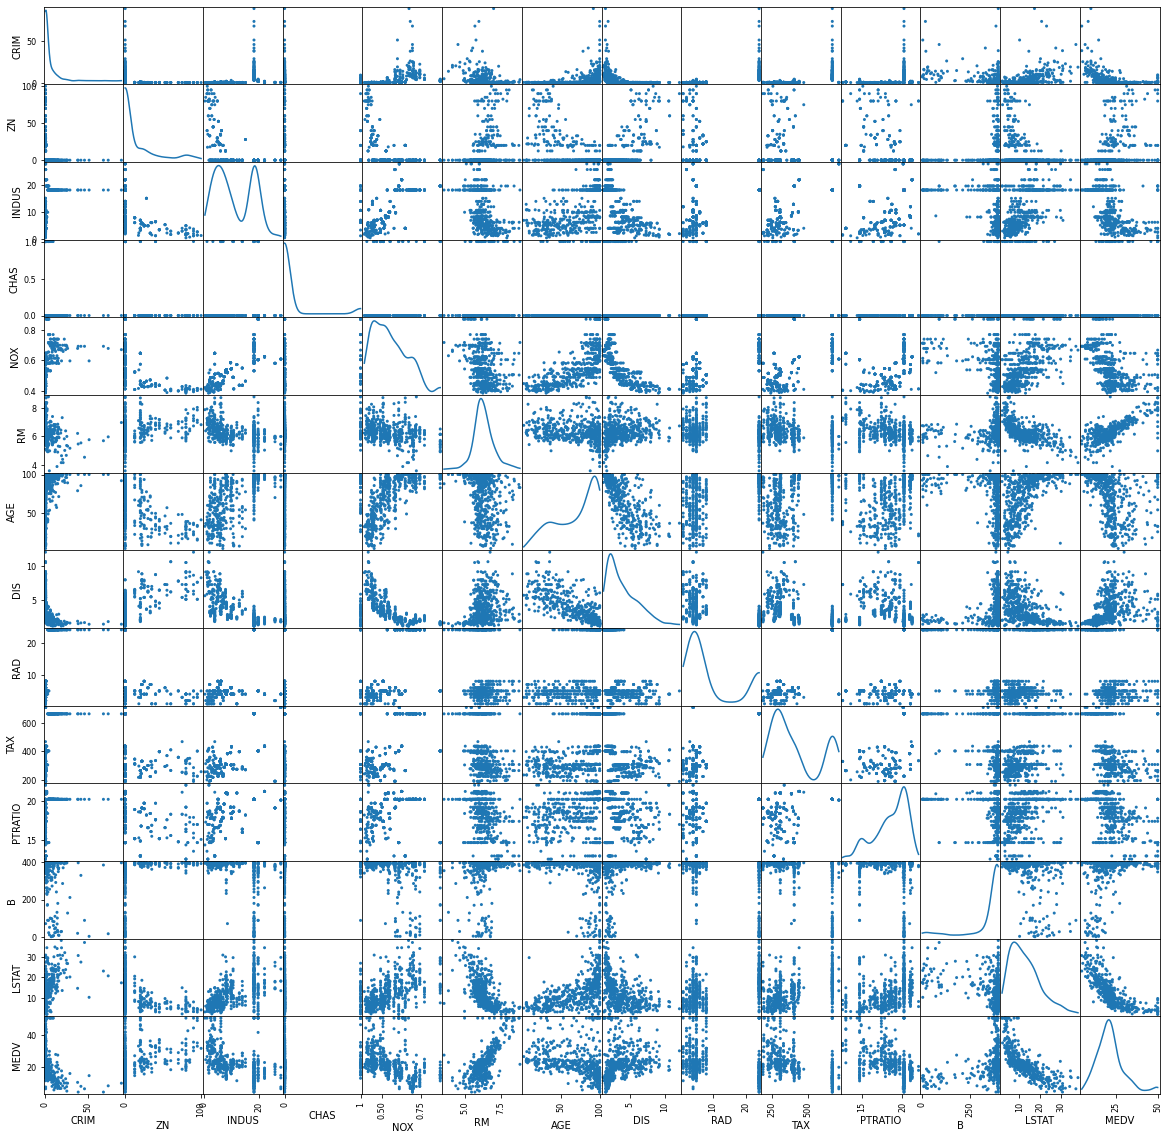

In [27]:
pd.plotting.scatter_matrix (df_data, diagonal = 'kde', alpha = 1, figsize = (20, 20))   # 대각선(diagonal)은 히스토그램 분포(kernel density estimate)
plt.show()

In [28]:
corr_data = np.corrcoef(scale_data.T)
corr_data.shape

(14, 14)

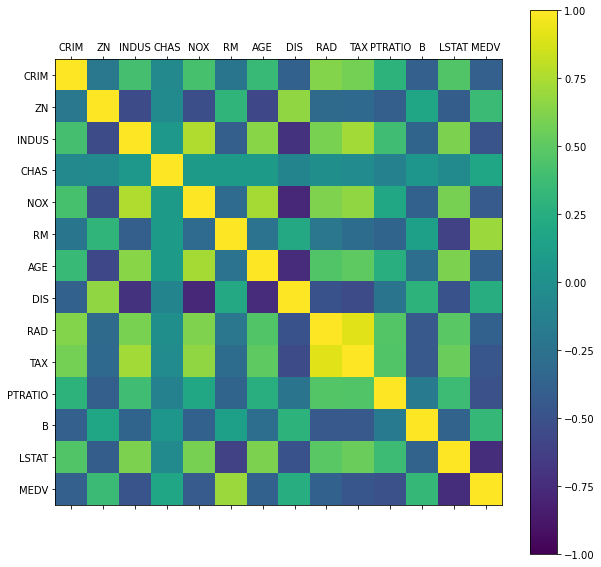

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)   # (111) = (1, 1, 1)
cax = ax.matshow(corr_data, vmin = -1, vmax = 1, interpolation = 'nearest')
fig.colorbar(cax)
fig.set_size_inches(10, 10)

ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(df_data.columns)
ax.set_yticklabels(df_data.columns)

plt.show()